In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install wxee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 2.4 MB/s eta 0:00:00


In [4]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.2 MB/s eta 0:00:00


# Flood

In [5]:
!git clone https://github.com/manmeet3591/download_noaa_storms_database

Cloning into 'download_noaa_storms_database'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 439.23 KiB | 4.35 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [6]:
!mv download_noaa_storms_database/floods.nc .

In [7]:
!ls

download_noaa_storms_database  drive  floods.nc  sample_data


In [8]:
import xarray as xr
ds_flood = xr.open_dataset('floods.nc').mean(dim='year')

In [9]:
ds_flood

<xarray.Dataset> Size: 20kB
Dimensions:            (lat: 43, lon: 55)
Coordinates:
  * lon                (lon) float64 440B -106.8 -106.5 -106.2 ... -93.5 -93.25
  * lat                (lat) float64 344B 25.75 26.0 26.25 ... 35.75 36.0 36.25
Data variables:
    flood_event_count  (lat, lon) float64 19kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

# Lightning

In [10]:
!ls /content/drive/MyDrive/wglc_climatology_30m_monthly.nc

/content/drive/MyDrive/wglc_climatology_30m_monthly.nc


In [11]:
ds_lightning = xr.open_dataset('/content/drive/MyDrive/wglc_climatology_30m_monthly.nc').density.sum(dim='time')

In [12]:
ds_lightning

<xarray.DataArray 'density' (lat: 360, lon: 720)> Size: 1MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 6kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75

# High Winds

In [13]:
!ls /content/drive/MyDrive/wind_frequency.nc

/content/drive/MyDrive/wind_frequency.nc


In [14]:
ds_winds = xr.open_dataset('/content/drive/MyDrive/wind_frequency.nc')

In [15]:
ds_winds

<xarray.Dataset> Size: 193kB
Dimensions:                (latitude: 101, longitude: 235)
Coordinates:
  * longitude              (longitude) float64 2kB 235.0 235.2 ... 293.2 293.5
  * latitude               (latitude) float64 808B 24.5 24.75 ... 49.25 49.5
Data variables:
    high_wind_event_count  (latitude, longitude) float64 190kB ...

# Hail

In [16]:
!git clone https://github.com/manmeet3591/download_hail
!mv download_hail/GPM_HailClimatology_BC2019_2deg.nc .

Cloning into 'download_hail'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 728.48 KiB | 4.05 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [17]:
import xarray as xr
ds_hail = xr.open_dataset('GPM_HailClimatology_BC2019_2deg.nc')

In [18]:
ds_hail

<xarray.Dataset> Size: 66kB
Dimensions:            (latitude: 90, longitude: 180)
Coordinates:
  * latitude           (latitude) float32 360B -89.0 -87.0 -85.0 ... 87.0 89.0
  * longitude          (longitude) float32 720B -179.0 -177.0 ... 177.0 179.0
Data variables:
    norm_hail_density  (latitude, longitude) float32 65kB ...

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


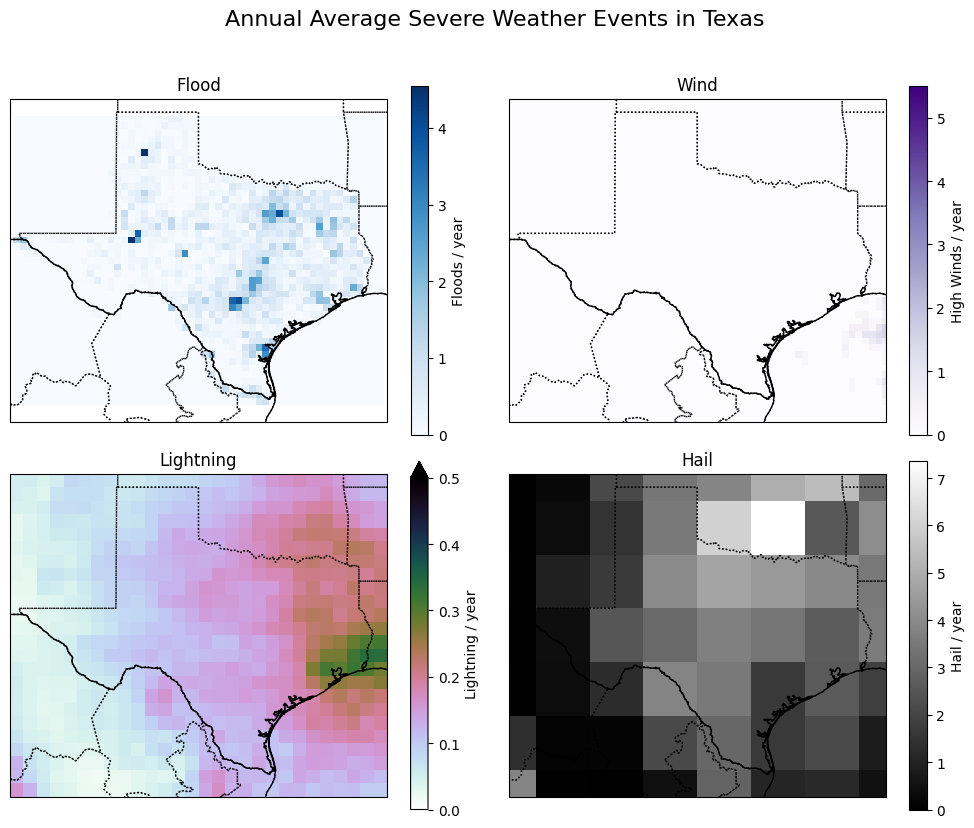

In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Define Texas bounding box
texas_extent = [-107, -93, 25, 37]  # [lon_min, lon_max, lat_min, lat_max]

# Create a 2x2 subplot with Cartopy projections
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot flood events
ds_flood.flood_event_count.plot(ax=axs[0, 0], cmap='Blues', cbar_kwargs={'label': 'Floods / year'})
axs[0, 0].set_title('Flood')
axs[0, 0].set_extent(texas_extent)
axs[0, 0].add_feature(cfeature.COASTLINE)
axs[0, 0].add_feature(cfeature.BORDERS)
axs[0, 0].add_feature(cfeature.STATES, linestyle=':')

# Plot wind events
ds_winds.high_wind_event_count.plot(ax=axs[0, 1], cmap='Purples', cbar_kwargs={'label': 'High Winds / year'})
axs[0, 1].set_title('Wind')
axs[0, 1].set_extent(texas_extent)
axs[0, 1].add_feature(cfeature.COASTLINE)
axs[0, 1].add_feature(cfeature.BORDERS)
axs[0, 1].add_feature(cfeature.STATES, linestyle=':')

# Plot lightning density
ds_lightning.plot(ax=axs[1, 0], cmap='cubehelix_r', cbar_kwargs={'label': 'Lightning / year'}, vmax=0.5)
axs[1, 0].set_title('Lightning')
axs[1, 0].set_extent(texas_extent)
axs[1, 0].add_feature(cfeature.COASTLINE)
axs[1, 0].add_feature(cfeature.BORDERS)
axs[1, 0].add_feature(cfeature.STATES, linestyle=':')

# Plot hail density
ds_hail.norm_hail_density.plot(ax=axs[1, 1], cmap='gist_yarg_r', cbar_kwargs={'label': 'Hail / year'})
axs[1, 1].set_title('Hail')
axs[1, 1].set_extent(texas_extent)
axs[1, 1].add_feature(cfeature.COASTLINE)
axs[1, 1].add_feature(cfeature.BORDERS)
axs[1, 1].add_feature(cfeature.STATES, linestyle=':')

plt.suptitle('Annual Average Severe Weather Events in Texas', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

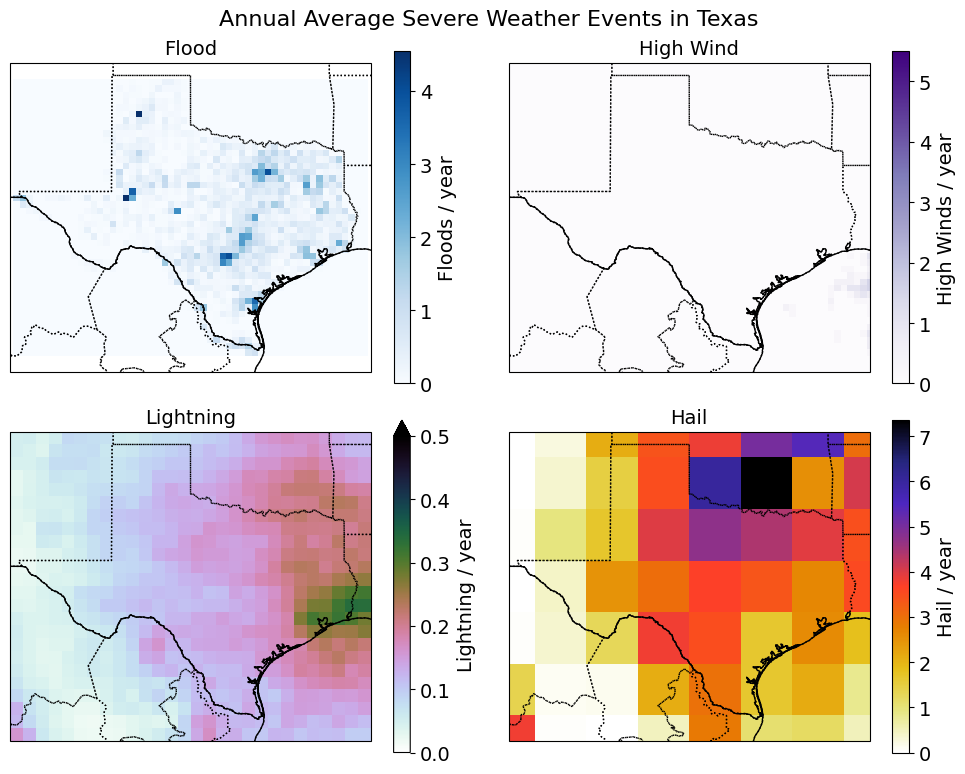

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.rcParams.update({'font.size': 14})
# Define Texas bounding box
texas_extent = [-107, -93, 25, 37]  # [lon_min, lon_max, lat_min, lat_max]

# # Major Texas cities with (latitude, longitude)
# cities = {
#     'Austin': (30.2672, -97.7431),
#     'Dallas': (32.7767, -96.7970),
#     'San Antonio': (29.4241, -98.4936),
#     'Houston': (29.7604, -95.3698),
#     'Abilene': (32.4487, -99.7331),
#     'Lubbock': (33.5779, -101.8552),
#     'Big Spring': (32.2504, -101.4787),
#     'Midland': (31.9973, -102.0779),
#     'Amarillo': (35.221997, -101.831297)
# }
# cities = {
#     'Austin': (30.2672, -97.7431),
#     'Dallas': (32.7767, -96.7970),
#     'San Antonio': (29.4241, -98.4936),
#     'Houston': (29.7604, -95.3698),
#     'Abilene': (32.4487, -99.7331),
#     'Lubbock': (33.5779, -101.8552),
#     # 'Big Spring': (32.2504, -101.4787),
#     # 'Midland': (31.9973, -102.0779),
#     'Amarillo': (35.221997, -101.831297),
#     # 'Fort Worth': (32.7555, -97.3308),
#     'El Paso': (31.7619, -106.4850),
#     'Odessa': (31.8457, -102.3676),
#     # 'Galveston': (29.3013, -94.7977),
#     'Waco': (31.5493, -97.1467),
#     'Corpus Christi': (27.8006, -97.3964),
#     'Laredo': (27.5036, -99.5075),
#     'McAllen': (26.2034, -98.2300),
#     # 'Brownsville': (25.9017, -97.4975),
#     # 'Beaumont': (30.0802, -94.1266),
#     # 'Victoria': (28.8053, -97.0036),
#     # 'Tyler': (32.3513, -95.3011),
#     # 'Longview': (32.5007, -94.7405),
#     # 'Denton': (33.2148, -97.1331),
#     # 'Killeen': (31.1171, -97.7278)
# }

# Create a 2x2 subplot with Cartopy projections
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot flood events
ds_flood.flood_event_count.plot(ax=axs[0, 0], cmap='Blues', cbar_kwargs={'label': 'Floods / year'})
axs[0, 0].set_title('Flood', fontsize=14)
axs[0, 0].set_extent(texas_extent)
axs[0, 0].add_feature(cfeature.COASTLINE)
axs[0, 0].add_feature(cfeature.BORDERS)
axs[0, 0].add_feature(cfeature.STATES, linestyle=':')

# Plot wind events
ds_winds.high_wind_event_count.plot(ax=axs[0, 1], cmap='Purples', cbar_kwargs={'label': 'High Winds / year'})
axs[0, 1].set_title('High Wind', fontsize=14)
axs[0, 1].set_extent(texas_extent)
axs[0, 1].add_feature(cfeature.COASTLINE)
axs[0, 1].add_feature(cfeature.BORDERS)
axs[0, 1].add_feature(cfeature.STATES, linestyle=':')

# Plot lightning density
ds_lightning.plot(ax=axs[1, 0], cmap='cubehelix_r', cbar_kwargs={'label': 'Lightning / year'}, vmax=0.5)
axs[1, 0].set_title('Lightning', fontsize=14)
axs[1, 0].set_extent(texas_extent)
axs[1, 0].add_feature(cfeature.COASTLINE)
axs[1, 0].add_feature(cfeature.BORDERS)
axs[1, 0].add_feature(cfeature.STATES, linestyle=':')

# Plot hail density
ds_hail.norm_hail_density.plot(ax=axs[1, 1], cmap='CMRmap_r', cbar_kwargs={'label': 'Hail / year'})
axs[1, 1].set_title('Hail', fontsize=14)
axs[1, 1].set_extent(texas_extent)
axs[1, 1].add_feature(cfeature.COASTLINE)
axs[1, 1].add_feature(cfeature.BORDERS)
axs[1, 1].add_feature(cfeature.STATES, linestyle=':')

# # Add cities to each subplot
# for ax in axs.flat:
#     for city, (lat, lon) in cities.items():
#         ax.plot(lon, lat, marker='x', color='black', markersize=5, transform=ccrs.PlateCarree())
#         ax.text(lon + 0.3, lat + 0.2, city, fontsize=12, color='black', transform=ccrs.PlateCarree())


# Add overall title
plt.suptitle('Annual Average Severe Weather Events in Texas', fontsize=16, y=0.97)
plt.tight_layout()
plt.savefig('fig2.png', dpi=500)

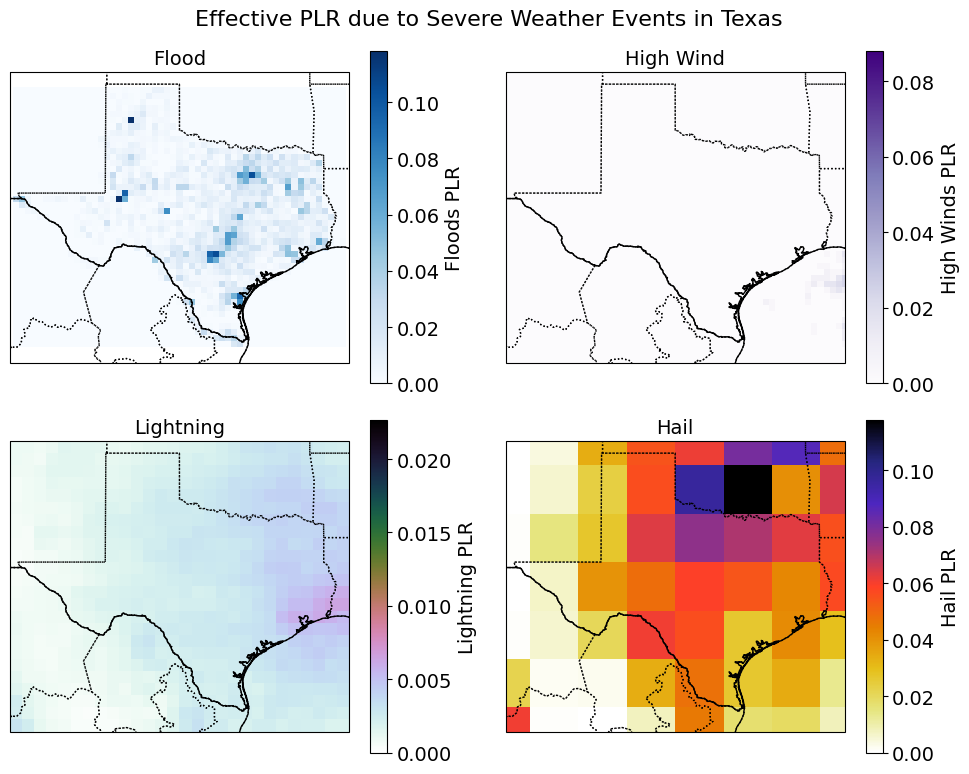

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.rcParams.update({'font.size': 14})
# Define Texas bounding box
texas_extent = [-107, -93, 25, 37]  # [lon_min, lon_max, lat_min, lat_max]

# # Major Texas cities with (latitude, longitude)
# cities = {
#     'Austin': (30.2672, -97.7431),
#     'Dallas': (32.7767, -96.7970),
#     'San Antonio': (29.4241, -98.4936),
#     'Houston': (29.7604, -95.3698),
#     'Abilene': (32.4487, -99.7331),
#     'Lubbock': (33.5779, -101.8552),
#     'Big Spring': (32.2504, -101.4787),
#     'Midland': (31.9973, -102.0779),
#     'Amarillo': (35.221997, -101.831297)
# }
# cities = {
#     'Austin': (30.2672, -97.7431),
#     'Dallas': (32.7767, -96.7970),
#     'San Antonio': (29.4241, -98.4936),
#     'Houston': (29.7604, -95.3698),
#     'Abilene': (32.4487, -99.7331),
#     'Lubbock': (33.5779, -101.8552),
#     # 'Big Spring': (32.2504, -101.4787),
#     # 'Midland': (31.9973, -102.0779),
#     'Amarillo': (35.221997, -101.831297),
#     # 'Fort Worth': (32.7555, -97.3308),
#     'El Paso': (31.7619, -106.4850),
#     'Odessa': (31.8457, -102.3676),
#     # 'Galveston': (29.3013, -94.7977),
#     'Waco': (31.5493, -97.1467),
#     'Corpus Christi': (27.8006, -97.3964),
#     'Laredo': (27.5036, -99.5075),
#     'McAllen': (26.2034, -98.2300),
#     # 'Brownsville': (25.9017, -97.4975),
#     # 'Beaumont': (30.0802, -94.1266),
#     # 'Victoria': (28.8053, -97.0036),
#     # 'Tyler': (32.3513, -95.3011),
#     # 'Longview': (32.5007, -94.7405),
#     # 'Denton': (33.2148, -97.1331),
#     # 'Killeen': (31.1171, -97.7278)
# }

# Create a 2x2 subplot with Cartopy projections
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot flood events
flood_plr = ds_flood.flood_event_count* 2.6*0.01
flood_plr.plot(ax=axs[0, 0], cmap='Blues', cbar_kwargs={'label': 'Floods PLR'})
axs[0, 0].set_title('Flood', fontsize=14)
axs[0, 0].set_extent(texas_extent)
axs[0, 0].add_feature(cfeature.COASTLINE)
axs[0, 0].add_feature(cfeature.BORDERS)
axs[0, 0].add_feature(cfeature.STATES, linestyle=':')

# Plot wind events
wind_plr = ds_winds.high_wind_event_count* 1.6*0.01
wind_plr.plot(ax=axs[0, 1], cmap='Purples', cbar_kwargs={'label': 'High Winds PLR'})
axs[0, 1].set_title('High Wind', fontsize=14)
axs[0, 1].set_extent(texas_extent)
axs[0, 1].add_feature(cfeature.COASTLINE)
axs[0, 1].add_feature(cfeature.BORDERS)
axs[0, 1].add_feature(cfeature.STATES, linestyle=':')

# Plot lightning density
lightning_plr = ds_lightning* 0.01*1.9
lightning_plr.plot(ax=axs[1, 0], cmap='cubehelix_r', cbar_kwargs={'label': 'Lightning PLR'})
axs[1, 0].set_title('Lightning', fontsize=14)
axs[1, 0].set_extent(texas_extent)
axs[1, 0].add_feature(cfeature.COASTLINE)
axs[1, 0].add_feature(cfeature.BORDERS)
axs[1, 0].add_feature(cfeature.STATES, linestyle=':')

# Plot hail density
hail_plr = ds_hail.norm_hail_density* 0.01*1.6
hail_plr.plot(ax=axs[1, 1], cmap='CMRmap_r', cbar_kwargs={'label': 'Hail PLR'})
axs[1, 1].set_title('Hail', fontsize=14)
axs[1, 1].set_extent(texas_extent)
axs[1, 1].add_feature(cfeature.COASTLINE)
axs[1, 1].add_feature(cfeature.BORDERS)
axs[1, 1].add_feature(cfeature.STATES, linestyle=':')

# Add cities to each subplot
# for ax in axs.flat:
#     for city, (lat, lon) in cities.items():
#         ax.plot(lon, lat, marker='x', color='black', markersize=5, transform=ccrs.PlateCarree())
#         ax.text(lon + 0.3, lat + 0.2, city, fontsize=12, color='black', transform=ccrs.PlateCarree())


# Add overall title
plt.suptitle('Effective PLR due to Severe Weather Events in Texas', fontsize=16, y=0.97)
plt.tight_layout()
plt.savefig('fig3.png', dpi=500)

In [22]:
# Define Texas bounding box
texas_lat_min, texas_lat_max = flood_plr.lat.min().item(), flood_plr.lat.max().item()
texas_lon_min, texas_lon_max = flood_plr.lon.min().item(), flood_plr.lon.max().item()

# Crop hail and lightning
hail_plr_cropped = hail_plr.sel(latitude=slice(texas_lat_min, texas_lat_max), longitude=slice(texas_lon_min, texas_lon_max))
lightning_plr_cropped = lightning_plr.sel(lat=slice(texas_lat_min, texas_lat_max), lon=slice(texas_lon_min, texas_lon_max))


In [23]:
hail_plr_cropped = hail_plr_cropped.fillna(0)
lightning_plr_cropped = lightning_plr_cropped.fillna(0)

In [24]:
# Interpolate to match flood_plr resolution and alignment

# Example coords: 'x', 'y', 'time'  ->  rename coord 'x' -> 'lon'
# Works for both dim names and coord names on a DataArray
wind_plr = wind_plr.rename({'latitude': 'lat', 'longitude': 'lon'})

In [25]:
hail_plr_cropped = hail_plr_cropped.rename({'latitude': 'lat', 'longitude': 'lon'})

# hail_plr_cropped = hail_plr_cropped.rename_vars({'latitude' : 'lat'})
# hail_plr_cropped = hail_plr_cropped.rename_vars({'longitude': 'lon'})

hail_resampled = hail_plr_cropped.interp_like(flood_plr)
lightning_resampled = lightning_plr_cropped.interp_like(flood_plr)
wind_resampled = wind_plr.interp_like(flood_plr)

In [26]:
# cumulative_plr = flood_plr + wind_resampled + hail_resampled + lightning_resampled
stacked = xr.concat([flood_plr, wind_resampled, hail_resampled, lightning_resampled], "member")
cumulative_plr = stacked.sum("member", skipna=True).where(stacked.count("member") > 0)


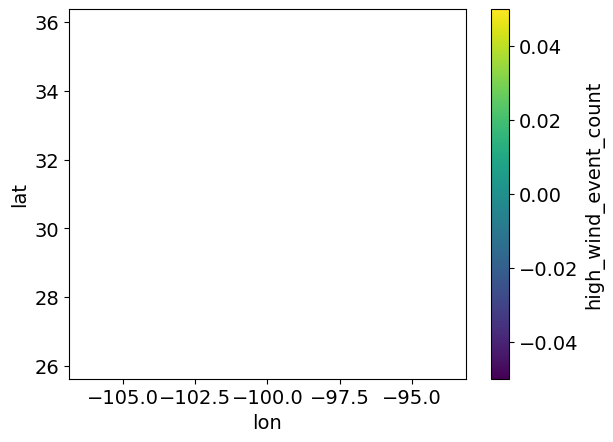

In [27]:
wind_resampled.plot()

Text(0.5, 1.0, 'Cumulative Effective PLR from Severe Weather Events in Texas')

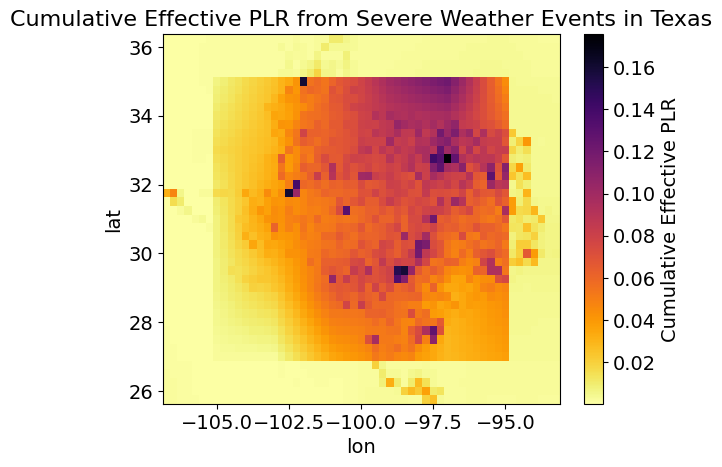

In [28]:
cumulative_plr.plot(
    cmap='inferno_r',
    cbar_kwargs={'label': 'Cumulative Effective PLR'}
)
plt.title('Cumulative Effective PLR from Severe Weather Events in Texas', fontsize=16)

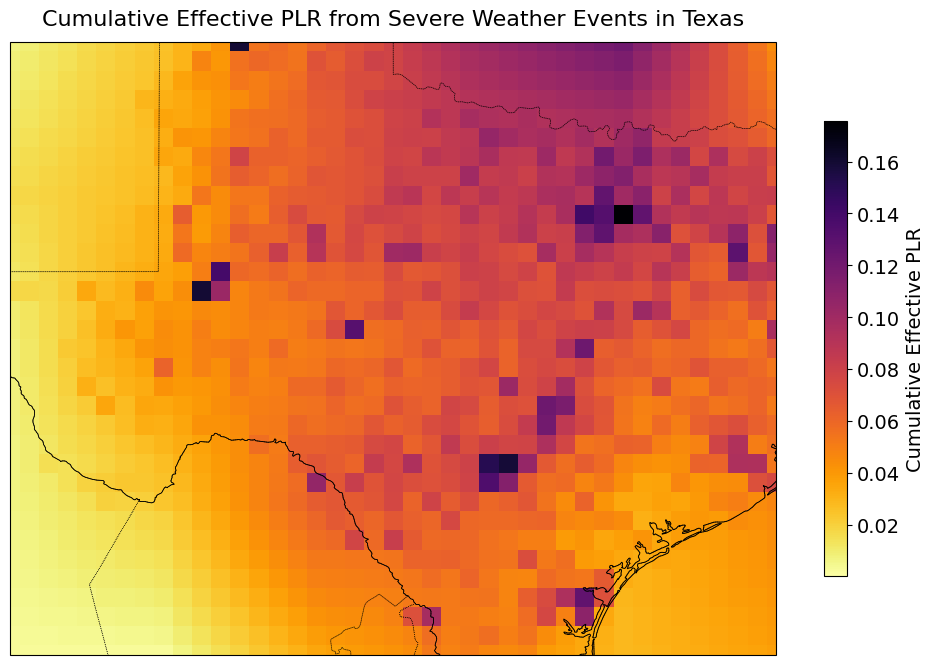

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.rcParams.update({'font.size': 14})

# Define Texas extent
texas_extent = [-105, -95, 27, 35]

# # Major cities to display
# cities = {
#     'Austin': (30.2672, -97.7431),
#     'Dallas': (32.7767, -96.7970),
#     'San Antonio': (29.4241, -98.4936),
#     'Houston': (29.7604, -95.3698),
#     'Abilene': (32.4487, -99.7331),
#     'Lubbock': (33.5779, -101.8552),
#     # 'Amarillo': (35.2220, -101.8313),
#     # 'El Paso': (31.7619, -106.4850),
#     'Odessa': (31.8457, -102.3676),
#     'Waco': (31.5493, -97.1467),
#     'Corpus Christi': (27.8006, -97.3964),
#     'Laredo': (27.5036, -99.5075),
#     # 'McAllen': (26.2034, -98.2300),
# }

# 1. Crop and fill global data if needed (already done before this step)
# 2. Interpolate to flood_plr grid (already done earlier)
# Assume you now have: cumulative_plr = flood_plr + wind_resampled + lightning_resampled + hail_resampled

# 3. Plot cumulative effective PLR
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the cumulative PLR data
# im = cumulative_plr.plot(
#     ax=ax,
#     cmap='inferno_r',
#     cbar_kwargs={'label': 'Cumulative Effective PLR'},
#     transform=ccrs.PlateCarree()
# )

im = cumulative_plr.plot(
    ax=ax,
    cmap='inferno_r',
    cbar_kwargs={
        'label': 'Cumulative Effective PLR',
        'shrink': 0.6,   # Makes the colorbar shorter
        'aspect': 20     # Makes the colorbar thinner
    },
    transform=ccrs.PlateCarree()
)

# Add geographic features
ax.set_extent(texas_extent)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=0.5)

# # Add cities
# for city, (lat, lon) in cities.items():
#     ax.plot(lon, lat, marker='x', color='black', markersize=5, transform=ccrs.PlateCarree())
#     ax.text(lon + 0.25, lat + 0.2, city, fontsize=14, color='black', transform=ccrs.PlateCarree())

# Title
ax.set_title('Cumulative Effective PLR from Severe Weather Events in Texas', fontsize=16, pad=12)

# Final layout and save
plt.tight_layout()
plt.savefig('cumulative_plr_texas.png', dpi=600, bbox_inches='tight')
plt.savefig('fig4.png', dpi=500)

In [48]:
import numpy as np
import pandas as pd
import xarray as xr

# ------------------------------
# Config — adjust for your setup
# ------------------------------
plr0_percent = 0.5                  # factory baseline PLR in %/yr (change if needed)
plr0 = plr0_percent / 100.0         # convert to fraction/yr
plr_is_percent = True               # set False if cumulative_plr is already a fraction

# Choose 3–4 Texas “regions” (representative points)
sites = {
    "North Texas (Dallas–Fort Worth)": (32.7767, -96.7970),
    "Central (Austin)":                (30.2672, -97.7431),
    "Gulf Coast (Houston)":            (29.7604, -95.3698),
    "West Texas (Lubbock)":            (33.5779, -101.8552),
}
sites = {
    "North Texas (Dallas–Fort Worth)": (32.7767, -96.7970),
    "Central (Austin)":                (30.2672, -97.7431),
    "Gulf Coast (Houston)":            (29.7604, -95.3698),
    "West Texas (Lubbock)":            (33.5779, -101.8552),

    "South Texas (San Antonio)":       (29.4241, -98.4936),
    "Panhandle (Amarillo)":            (35.2220, -101.8310),
    "Permian Basin (Midland–Odessa)":  (31.9973, -102.0779),
    "Far West (El Paso)":              (31.7619, -106.4850),

    "Rio Grande Valley (McAllen)":     (26.2034, -98.2300),
    "Coastal Bend (Corpus Christi)":   (27.8006, -97.3964),
    "North Coast (Galveston)":         (29.3013, -94.7977),
    "South Padre Island":              (26.1118, -97.1681),

    "East Texas (Tyler)":              (32.3513, -95.3011),
    "Golden Triangle (Beaumont)":      (30.0802, -94.1266),
    "Brazos Valley (College Station)": (30.6280, -96.3344),
    "Hill Country (Fredericksburg)":   (30.2747, -98.8719),
    "Big Bend (Alpine)":               (30.3585, -103.6610),
}

# OPTIONAL: provide your component layers to auto-fill "Key Factors"
# Comment this block out if you don't have these variables in memory.
try:
    components = {
        "Hail":      hail_resampled,
        "Wind":      wind_resampled,
        "Lightning": lightning_resampled,
        "Flood":     flood_plr,
    }
except NameError:
    components = None  # components not available

# ------------------------------
# Helpers
# ------------------------------
def to_frac(x):
    return x / 100.0 if plr_is_percent else x

def T80(plr_eff):
    """Exact EOL at 80% power for constant annual loss plr_eff (fraction/yr)."""
    # Guard rails: invalid values -> NaN
    plr_eff = xr.apply_ufunc(np.asarray, plr_eff)
    safe = (plr_eff > 0) & (plr_eff < 1)
    return xr.where(safe, np.log(0.8) / np.log(1.0 - plr_eff), np.nan)

def pick_key_factors(lat, lon):
    if components is None:
        return "—"
    vals = []
    for nice, da in components.items():
        try:
            v = to_frac(da.sel(lat=lat, lon=lon, method="nearest"))
            v = float(v) if not hasattr(v, "mean") else float(v.mean())  # collapse if MC dim exists
            vals.append((nice, v))
        except Exception:
            pass
    if not vals:
        return "—"
    vals.sort(key=lambda t: t[1], reverse=True)
    top = [k for k, _ in vals[:2]]
    # Make short, interpretable phrases
    phrases = {
        "Hail": "Frequent hail",
        "Wind": "Severe winds",
        "Lightning": "High lightning density",
        "Flood": "Flood/flash-flood risk",
    }
    return ", ".join(phrases.get(k, k) for k in top)

def find_mc_dim(da):
    names = [d.lower() for d in da.dims]
    for cand in ("member", "members", "ens", "ensemble", "draw", "sample", "samples", "mc"):
        if cand in names:
            # return the original-case name
            return da.dims[names.index(cand)]
    return None

# ------------------------------
# Build the table
# ------------------------------
rows = []
base_eol = float(T80(plr0))  # same for all rows

for region, (lat, lon) in sites.items():
    # Sample incremental hazard PLR at site
    s = cumulative_plr.sel(lat=lat, lon=lon, method="nearest")
    mc_dim = find_mc_dim(s)

    key_factors = pick_key_factors(lat, lon)

    if mc_dim:  # Monte-Carlo case
        plr_eff = plr0 + to_frac(s)
        eol = T80(plr_eff)
        med = float(eol.median(mc_dim))
        lo  = float(eol.quantile(0.05, dim=mc_dim))
        hi  = float(eol.quantile(0.95, dim=mc_dim))
        p25 = float(((eol < 25).mean(mc_dim) * 100.0))
        ci  = f"{round(lo,1)}–{round(hi,1)}"
    else:       # deterministic case
        plr_eff = plr0 + float(to_frac(s))
        eol = float(T80(plr_eff))
        med = eol
        ci  = ""     # not available without MC
        # As a deterministic proxy, this is either 0% or 100%
        p25 = 100.0 if eol < 25 else 0.0

    rows.append({
        "Region (Texas)":               region,
        "Median EOL – Baseline (yr)":  round(base_eol, 1),
        "Median EOL – Adjusted (yr)":  round(med, 1) if np.isfinite(med) else np.nan,
        "90% CI (yr)":                 ci,
        "Probability(EOL < 25 yr)":    f"{round(p25, 1)} %",
        "Key Factors":                 key_factors,
    })

df = pd.DataFrame(rows)
print(df.to_string(index=False))

# Optional: save
df.to_csv("texas_eol_table.csv", index=False)

                 Region (Texas)  Median EOL – Baseline (yr)  Median EOL – Adjusted (yr) 90% CI (yr) Probability(EOL < 25 yr)                          Key Factors
North Texas (Dallas–Fort Worth)                        44.5                        35.4                                0.0 %          Frequent hail, Severe winds
               Central (Austin)                        44.5                        36.1                                0.0 % Severe winds, Flood/flash-flood risk
           Gulf Coast (Houston)                        44.5                        40.4                                0.0 %          Frequent hail, Severe winds
           West Texas (Lubbock)                        44.5                        39.6                                0.0 %          Frequent hail, Severe winds
      South Texas (San Antonio)                        44.5                        33.8                                0.0 % Severe winds, Flood/flash-flood risk
           Panhandle (Amaril

In [54]:
plr_eff = plr0 + cumulative_plr*0.01
T80_ = T80(plr_eff)

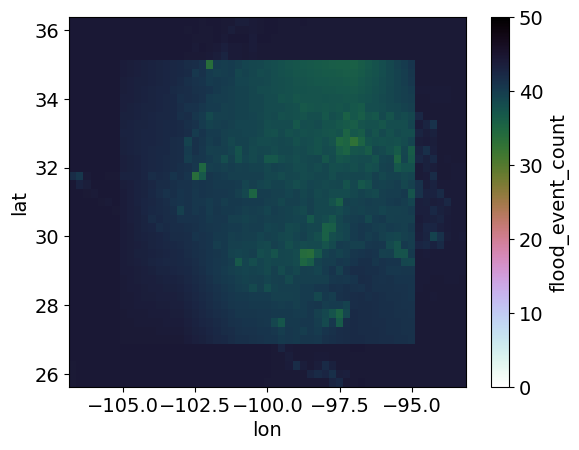

In [57]:
T80_.plot(cmap='cubehelix_r', vmin=0, vmax=50)

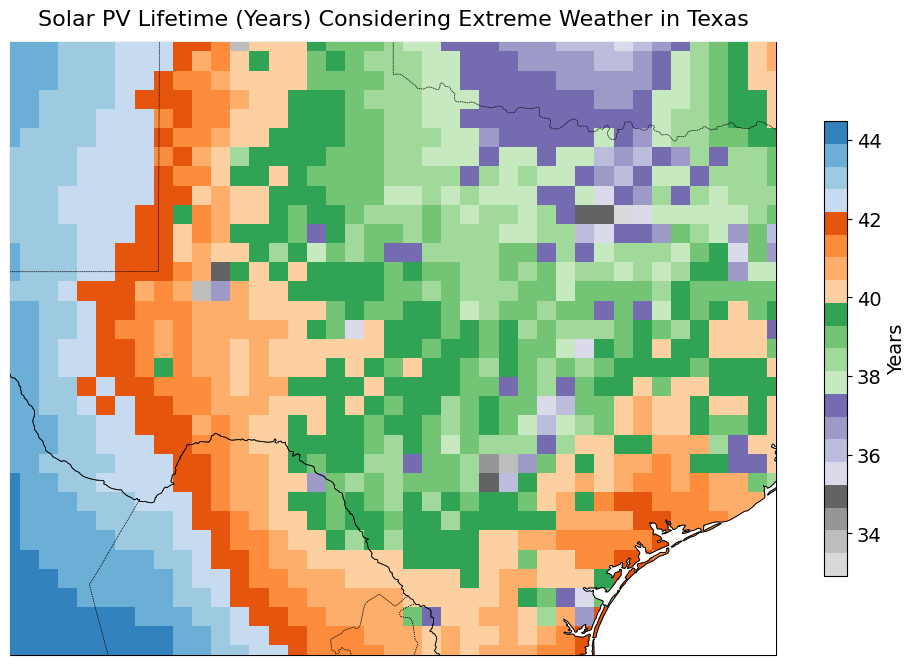

In [64]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.rcParams.update({'font.size': 14})

# Define Texas extent
texas_extent = [-105, -95, 27, 35]

# # Major cities to display
# cities = {
#     'Austin': (30.2672, -97.7431),
#     'Dallas': (32.7767, -96.7970),
#     'San Antonio': (29.4241, -98.4936),
#     'Houston': (29.7604, -95.3698),
#     'Abilene': (32.4487, -99.7331),
#     'Lubbock': (33.5779, -101.8552),
#     # 'Amarillo': (35.2220, -101.8313),
#     # 'El Paso': (31.7619, -106.4850),
#     'Odessa': (31.8457, -102.3676),
#     'Waco': (31.5493, -97.1467),
#     'Corpus Christi': (27.8006, -97.3964),
#     'Laredo': (27.5036, -99.5075),
#     # 'McAllen': (26.2034, -98.2300),
# }

# 1. Crop and fill global data if needed (already done before this step)
# 2. Interpolate to flood_plr grid (already done earlier)
# Assume you now have: cumulative_plr = flood_plr + wind_resampled + lightning_resampled + hail_resampled

# 3. Plot cumulative effective PLR
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the cumulative PLR data
# im = cumulative_plr.plot(
#     ax=ax,
#     cmap='inferno_r',
#     cbar_kwargs={'label': 'Cumulative Effective PLR'},
#     transform=ccrs.PlateCarree()
# )

im = T80_.plot(
    ax=ax,
    cmap='tab20c_r',
    cbar_kwargs={
        'label': 'Years',
        'shrink': 0.6,   # Makes the colorbar shorter
        'aspect': 20     # Makes the colorbar thinner
    },
    transform=ccrs.PlateCarree()
)

# Add geographic features
ax.set_extent(texas_extent)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
ax.add_feature(cfeature.BORDERS, linewidth=0.6)
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=0.5)

# # Add cities
# for city, (lat, lon) in cities.items():
#     ax.plot(lon, lat, marker='x', color='black', markersize=5, transform=ccrs.PlateCarree())
#     ax.text(lon + 0.25, lat + 0.2, city, fontsize=14, color='black', transform=ccrs.PlateCarree())

# Title
ax.set_title('Solar PV Lifetime (Years) Considering Extreme Weather in Texas', fontsize=16, pad=12)
ax.add_feature(
    cfeature.OCEAN,
    facecolor='white',   # or match your figure background
    edgecolor='none',
    zorder=10            # higher than the data layer
)

# Optional: keep your data visible above land/boundaries
im.set_zorder(5)

# Draw outlines on top
ax.add_feature(cfeature.COASTLINE, linewidth=0.7, zorder=11)
ax.add_feature(cfeature.BORDERS, linewidth=0.6, zorder=11)
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=0.5, zorder=11)
# Final layout and save
plt.tight_layout()
plt.savefig('cumulative_plr_texas.png', dpi=600, bbox_inches='tight')
plt.savefig('fig5.png', dpi=500)

In [65]:
T80_.to_netcdf('eol_weather.nc')